In [ ]:
# 필요한 모듈 import

import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
fashion_mnist = keras.datasets.fashion_mnist

(X_train_all, y_train_all),(X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 데이터를 정수형으로 변환

X_train_all.astype(int)
y_train_all.astype(int)

array([9, 0, 0, ..., 3, 0, 5])

In [ ]:
# 2차원 배열을 3차원으로
X_train_all.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
print(X_train_all.shape)
print(y_train_all.shape)
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [ ]:
# 데이터 시각화(숫자 그대로 배열)

for row in range(28):
  for col in range(28):
    print('{:4d}'.format(X_train_all[0][row][col]), end='')
  print() 

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3
   0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15
   0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66
   0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127

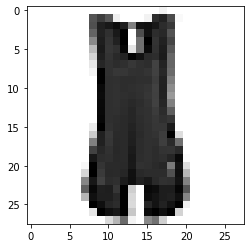

In [ ]:
# 이미지로 시각화

plt.imshow(X_train_all[4], cmap='Greys', interpolation = 'nearest');

In [ ]:
# 타겟 확인

y_train_all[0:8]

array([9, 0, 0, 3, 0, 2, 7, 2], dtype=uint8)

In [ ]:
class_names = ['티셔츠/윗도리','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵클부츠']
print(class_names[y_train_all[0]])

앵클부츠


In [ ]:
# 타겟 분포 확인
pd.Series(y_train_all).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [ ]:
np.bincount(y_train_all) # 배열에 있는 정수값의 빈도를 세고, 정수에 해당하는 인덱스 위치에 저장함

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

In [ ]:
# 데이터 정규화

X_train = X_train.reshape(-1,784)/255
X_val = X_val.reshape(-1,784)/255
X_test = X_test.reshape(-1,784)/255

In [ ]:
# 타겟 데이터 인코딩

from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test) # 정답 데이터 - 나중에 확인 목적으로 같이 인코딩 해둠

In [ ]:
print(y_train_encoded.shape, y_val_encoded.shape)
print(y_train[0], y_train_encoded[0]) #y_train[0]이 인코딩되면 이렇게 나온다

(48000, 10) (12000, 10)
7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# 인공 신경망 모델 구성

In [ ]:
# 모델 구조 구성

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units = 100, input_shape = (784,), activation = 'sigmoid')) #input dim = 784 써도됨 #kernal_initializer='uniform' -> 글로럿 유니폼(default) 대신 그냥 유니폼을 사용한다
model.add(Dense(units = 100, activation = 'sigmoid'))
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
# 최적화 알고리즘과 손실함수 지정

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


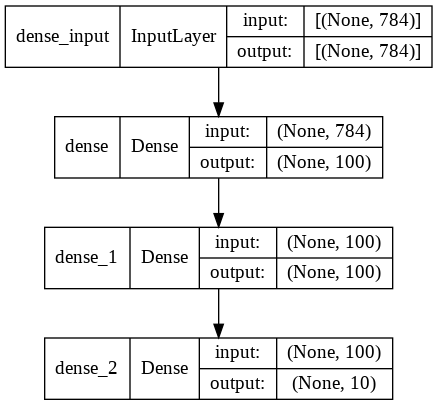

In [ ]:
# 모델 구조 시각화

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file = 'fsMNIST.png')

In [ ]:
# 모델 훈련

history = model.fit(X_train, y_train_encoded, epochs=10, validation_data = (X_val, y_val_encoded))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6597 - accuracy: 0.7776 - val_loss: 0.4463 - val_accuracy: 0.8373
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4030 - accuracy: 0.8550 - val_loss: 0.3774 - val_accuracy: 0.8621
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3648 - accuracy: 0.8676 - val_loss: 0.3655 - val_accuracy: 0.8683
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3399 - accuracy: 0.8756 - val_loss: 0.3453 - val_accuracy: 0.8725
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3204 - accuracy: 0.8830 - val_loss: 0.3353 - val_accuracy: 0.8764
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3053 - accuracy: 0.8885 - val_loss: 0.3189 - val_accuracy: 0.8832
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2924 - accuracy: 0.8929 - val_loss: 0.3303 - val_accuracy:

In [ ]:
# 모델 학습결과 시각화

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.659692,0.777646,0.446348,0.837333
1,0.402986,0.854958,0.377382,0.862083
2,0.364776,0.867604,0.365468,0.868333
3,0.339943,0.875625,0.345316,0.872500
4,0.320383,0.882979,0.335270,0.876417
5,0.305283,0.888542,0.318898,0.883167
6,0.292355,0.892875,0.330316,0.878417
7,0.279670,0.896167,0.320548,0.883917
8,0.269982,0.900708,0.344867,0.874833
9,0.260061,0.905292,0.312375,0.886750


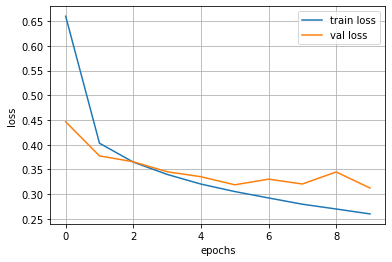

In [ ]:
# 손실 함수 시각화

plt.plot(df['loss'], label = 'train loss')
plt.plot(df['val_loss'], label = 'val loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

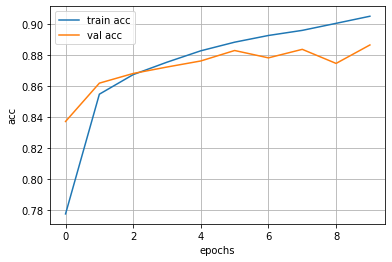

In [ ]:
# 정확도 시각화

plt.plot(df['accuracy'], label = 'train acc')
plt.plot(df['val_accuracy'], label = 'val acc')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend();

In [ ]:
# 정확도, 손실함수 확인하기

loss, accuracy = model.evaluate(X_val, y_val_encoded, verbose=0) # 손실 값과 metrics 매개변수에 추가한 측정 지표 계산, 손실함수 - 정확도 순
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(accuracy,test_accuracy)
print(loss, test_loss)

0.8867499828338623 0.8787000179290771
0.3123752176761627 0.33829277753829956


In [ ]:
# 테스트 데이터 예측

np.set_printoptions(suppress=True)
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=-1)
y_pred_label[:5]

array([9, 2, 1, 1, 6])

In [ ]:
# 오차행렬로 정확도 확인하기(테스트 세트)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_label))
print(accuracy_score(y_test, y_pred_label))
print(classification_report(y_test, y_pred_label))

[[892   1  15  18   1   2  63   0   8   0]
 [  3 967   1  23   3   0   1   0   2   0]
 [ 24   0 806  14  91   0  63   0   2   0]
 [ 47   8   9 895  19   0  19   0   3   0]
 [  0   1  99  49 782   0  65   0   4   0]
 [  0   0   0   1   0 942   0  40   1  16]
 [179   1  94  27  65   0 615   0  19   0]
 [  0   0   0   0   0  14   0 952   0  34]
 [  3   0   2   4   3   1   4   6 977   0]
 [  0   0   0   0   0   9   1  31   0 959]]
0.8787
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.87      0.90      0.88      1000
           4       0.81      0.78      0.80      1000
           5       0.97      0.94      0.96      1000
           6       0.74      0.61      0.67      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.

1214


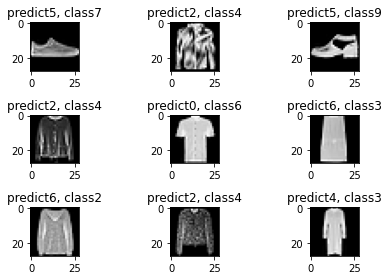

In [ ]:
# 모델 학습결과 확인

# 정답을 못맞춘 경우

incorrect_indices = np.nonzero(y_pred_label != y_test)[0]
print(len(incorrect_indices))

plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title('predict{}, class{}'.format(y_pred_label[incorrect], y_test[incorrect]))
plt.tight_layout()



8786


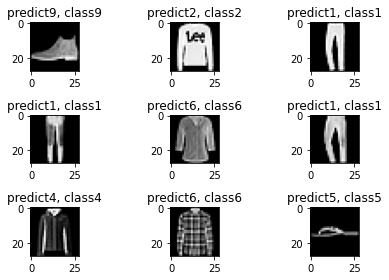

In [ ]:
# 정답을 맞춘 경우

correct_indices = np.nonzero(y_pred_label == y_test)[0]
print(len(correct_indices))

plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
  plt.title('predict{}, class{}'.format(y_pred_label[correct], y_test[correct]))
plt.tight_layout()

In [ ]:
# 제출파일 생성
sub = pd.read_csv('/content/submission.csv')

In [ ]:
sub['label'] = y_pred_label
sub.to_csv('./submission1_epoch10.csv',index=False) # Accuracy: 0.8786

In [ ]:
# 하이퍼 파라미터 튜닝(epoch 값 수정)

# epoch=2 ver.

model = Sequential()
model.add(Dense(units = 100, input_shape = (784,), activation = 'sigmoid')) #input dim = 784 써도됨
model.add(Dense(units = 100, activation = 'sigmoid'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=2, validation_data = (X_val, y_val_encoded))
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=-1)

sub['label'] = y_pred_label
sub.to_csv('./submission2_epoch2.csv',index=False) # Accuracy: 0.851

Epoch 1/2
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6494 - accuracy: 0.7818 - val_loss: 0.4498 - val_accuracy: 0.8370
Epoch 2/2
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4040 - accuracy: 0.8545 - val_loss: 0.3854 - val_accuracy: 0.8577


In [ ]:
# epoch=100 ver.

model = Sequential()
model.add(Dense(units = 100, input_shape = (784,), activation = 'sigmoid')) #input dim = 784 써도됨
model.add(Dense(units = 100, activation = 'sigmoid'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=100, validation_data = (X_val, y_val_encoded))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=-1)

sub['label'] = y_pred_label
sub.to_csv('./submission3_epoch100.csv',index=False) # Accuracy: 0.8782

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6472 - accuracy: 0.7828 - val_loss: 0.4340 - val_accuracy: 0.8422
Epoch 2/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4034 - accuracy: 0.8539 - val_loss: 0.3881 - val_accuracy: 0.8565
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3595 - accuracy: 0.8702 - val_loss: 0.3597 - val_accuracy: 0.8662
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3364 - accuracy: 0.8774 - val_loss: 0.3405 - val_accuracy: 0.8746
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3189 - accuracy: 0.8832 - val_loss: 0.3419 - val_accuracy: 0.8747
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3022 - accuracy: 0.8894 - val_loss: 0.3334 - val_accuracy: 0.8767
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2898 - accuracy: 0.8936 - val_loss: 0.3242 - val_ac

In [ ]:
# epoch ~100 중 손실함수 최솟값 및 정확도 최댓값이 되는 epoch 확인
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.647215,0.782792,0.433955,0.842250
1,0.403432,0.853875,0.388146,0.856500
2,0.359486,0.870208,0.359723,0.866167
3,0.336416,0.877375,0.340500,0.874583
4,0.318941,0.883167,0.341891,0.874667
...,...,...,...,...
95,0.041916,0.984688,0.672023,0.884000
96,0.037397,0.986708,0.666572,0.885250
97,0.037203,0.986167,0.663990,0.886500
98,0.036353,0.986625,0.662900,0.886417


In [ ]:
min(df['val_loss'])

0.30431100726127625

In [ ]:
max(df['val_accuracy'])

0.8953333497047424

In [ ]:
df[df['val_loss']==min(df['val_loss'])] # 손실함수 최소 epoch = 15

,loss,accuracy,val_loss,val_accuracy
14,0.221002,0.917875,0.304311,0.893833


In [ ]:
df[df['val_accuracy']==max(df['val_accuracy'])] # 정확도 최대 epoch = 24

,loss,accuracy,val_loss,val_accuracy
23,0.171726,0.936146,0.320119,0.895333


In [ ]:
# epoch=15 (min_val loss)
model = Sequential()
model.add(Dense(units = 100, input_shape = (784,), activation = 'sigmoid')) #input dim = 784 써도됨
model.add(Dense(units = 100, activation = 'sigmoid'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=15, validation_data = (X_val, y_val_encoded))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=-1)
y_pred_label[:5]

sub['label'] = y_pred_label
sub.to_csv('./submission4_epoch15_min_val_loss.csv',index=False) # Accuracy: 0.8762

Epoch 1/15
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6493 - accuracy: 0.7830 - val_loss: 0.4447 - val_accuracy: 0.8393
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4024 - accuracy: 0.8550 - val_loss: 0.3802 - val_accuracy: 0.8608
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3634 - accuracy: 0.8687 - val_loss: 0.3633 - val_accuracy: 0.8664
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3402 - accuracy: 0.8758 - val_loss: 0.3470 - val_accuracy: 0.8737
Epoch 5/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3188 - accuracy: 0.8842 - val_loss: 0.3507 - val_accuracy: 0.8716
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3042 - accuracy: 0.8889 - val_loss: 0.3305 - val_accuracy: 0.8794
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.8922 - val_loss: 0.3260 - val_accuracy:

In [ ]:
# epoch=24 (max_val_acc)
model = Sequential()
model.add(Dense(units = 100, input_shape = (784,), activation = 'sigmoid')) #input dim = 784 써도됨
model.add(Dense(units = 100, activation = 'sigmoid'))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=24, validation_data = (X_val, y_val_encoded))

y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=-1)
y_pred_label[:5]

sub['label'] = y_pred_label
sub.to_csv('./submission5_epoch24_max_val_acc.csv',index=False) # Accuracy: 0.8784

Epoch 1/24
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6591 - accuracy: 0.7802 - val_loss: 0.4493 - val_accuracy: 0.8388
Epoch 2/24
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4061 - accuracy: 0.8537 - val_loss: 0.3880 - val_accuracy: 0.8608
Epoch 3/24
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3673 - accuracy: 0.8668 - val_loss: 0.3718 - val_accuracy: 0.8620
Epoch 4/24
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3431 - accuracy: 0.8752 - val_loss: 0.3550 - val_accuracy: 0.8710
Epoch 5/24
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3249 - accuracy: 0.8821 - val_loss: 0.3407 - val_accuracy: 0.8772
Epoch 6/24
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3076 - accuracy: 0.8881 - val_loss: 0.3299 - val_accuracy: 0.8814
Epoch 7/24
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2968 - accuracy: 0.8916 - val_loss: 0.3338 - val_accuracy:

### 최고 점수: Accuracy 0.8786